In [6]:
%matplotlib inline

from IPython.core.pylabtools import figsize
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Loading matlab styles from
# https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers
import json
s = json.load(open("bmh_matplotlibrc.json"))
mpl.rcParams.update(s)

/Users/zmorsalin/Envs/noisynyc/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [7]:
data = pd.read_csv('data/titanic/train.csv')

### Clean Data 
* who column
* Fix NAAN in Cabin
* More detailed Embarked column

In [8]:
# Add column to determine child man and females
def is_woman_child_or_man(passenger):
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return 'man' if sex == 'male' else 'female'
        
data["Sex"].unique()
data["Who"] = data[["Age", "Sex"]].apply(is_woman_child_or_man, axis=1)
data["Embarked"] = data['Embarked'].map({"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"})
data = data.drop(['Ticket','Cabin'], axis=1) 
data.dropna()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Who
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,Southampton,man
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,Cherbourg,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,Southampton,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,Southampton,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,Southampton,man


###Lets plot some of the data we have

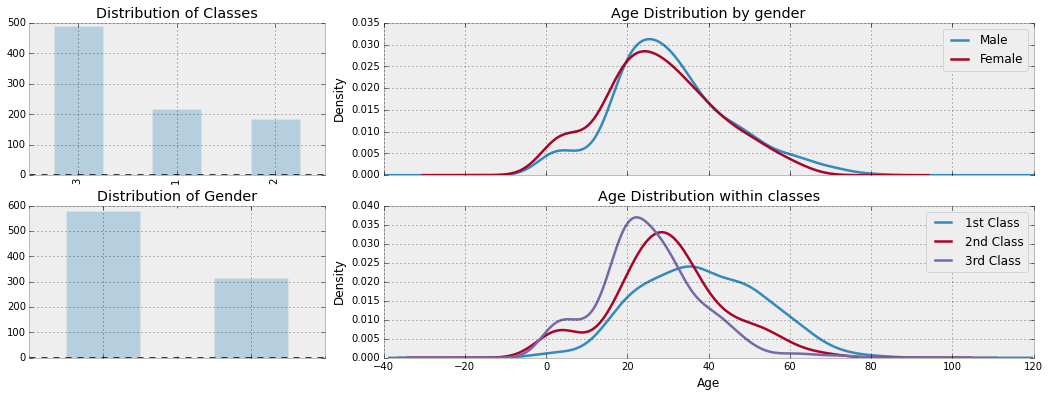

In [10]:
# TODO: x labels for bar charts
# TODO: Fill area under 
fig = plt.figure(figsize=(18,6)) 

plot_1 = plt.subplot2grid((2,3),(1,0))              
data['Sex'].value_counts().plot(kind='bar', alpha=.3)
plt.title("Distribution of Gender")  
locs, labels = plt.xticks()
plt.setp(labels, rotation=0)

plot_2 = plt.subplot2grid((2,3),(0,1), colspan=2)
data['Age'][data['Sex'] == 'male'].plot(kind='kde')    
data['Age'][data['Sex'] == 'female'].plot(kind='kde')
plt.xlabel("Age")    
plt.title("Age Distribution by gender")
plt.legend(('Male', 'Female'),loc='best') 

plot_3 = plt.subplot2grid((2,3),(0,0))              
data['Pclass'].value_counts().plot(kind='bar', alpha=.3)
plt.title("Distribution of Classes")

plot_4 = plt.subplot2grid((2,3),(1,1), colspan=2)
a = data['Age'][data['Pclass'] == 1]
data['Age'][data['Pclass'] == 1].plot(kind='kde')    
data['Age'][data['Pclass'] == 2].plot(kind='kde')
data['Age'][data['Pclass'] == 3].plot(kind='kde')

# plt.fill_between(a.values, .5, a.min())

plt.xlabel("Age")    
plt.title("Age Distribution within classes")
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

In [5]:
from IPython.core.display import HTML

def css_styling():
    styles = open("custom_style.css", "r").read() #or edit path to custom.css
    return HTML(styles)
css_styling()